<a href="https://colab.research.google.com/github/ToaiDinh/Robot-2dof/blob/main/ANN_Robot2DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv

url = 'drive/MyDrive/data_training/robot_2dof/robot_2dof.csv'
step = np.pi/200
l1 = 50
l2 = 40
arr_1 = np.arange(step,2*np.pi,step)
arr_2 = np.arange(step,np.pi,step)
theta = np.array([[0,0]])
p = np.array([[90,0]])
header = ['Position_x','Position_y','Theta_1','Theta_2']
with open(url,'w') as file:
  writer = csv.writer(file)
  writer.writerow(header);
  for i in arr_1:
    for j in arr_2:
      theta = np.concatenate((theta,[[i,j]]),axis=0)
      px = l1*np.cos(i)+l2*np.cos(i+j)
      py = l1*np.sin(i)+l2*np.sin(i+j)
      p = np.concatenate((p,[[px,py]]),axis=0)
      data = [px,py,i,j]
      writer.writerow(data)
file.close()
print(theta.shape)
print(p.shape)

(79402, 2)
(79402, 2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
p = (p+90)/180
theta[0:,0] /= 2*np.pi
theta[0:,1] /= np.pi

In [ ]:
print(np.max(p))
print(np.max(theta))
print(np.min(p))
print(np.min(theta))

1.0
0.9975
2.7415004075395346e-05
0.0


In [ ]:
print(theta[40000])
print(l1*np.cos(theta[40000][0]*2*np.pi)+l2*np.cos(theta[40000][0]*2*np.pi+theta[40000][1]*np.pi))
print(l1*np.sin(theta[40000][0]*2*np.pi)+l2*np.sin(theta[40000][0]*2*np.pi+theta[40000][1]*np.pi))
print(p[40000])

[0.5 1. ]
-10.0
-3.67394039744206e-15
[46.70861616 63.87107639]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler

x_train,x_test,y_train,y_test = train_test_split(p,theta,test_size=0.2)
"""
x_train_scale = scale(x_train)
scaler = StandardScaler().fit(x_train)
x_test_scale = scaler.transform(x_test)
"""
print("x_train shape ",x_train.shape)
print("y_train shape ",y_train.shape)

x_train shape  (63521, 2)
y_train shape  (63521, 2)


In [ ]:
model = Sequential()
model.add(Dense(100,kernel_initializer='normal',activation='relu',input_shape=(2,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 80)                4080      
                                                                 
 dense_3 (Dense)             (None, 30)                2430      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 12,192
Trainable params: 12,192
Non-traina

Epoch 1/50
3176/3176 [==============================] - 9s 3ms/step - loss: 0.0152 - accuracy: 0.8867 - val_loss: 0.0154 - val_accuracy: 0.8664
Epoch 2/50
3176/3176 [==============================] - 9s 3ms/step - loss: 0.0073 - accuracy: 0.9385 - val_loss: 0.0052 - val_accuracy: 0.9384
Epoch 3/50
3176/3176 [==============================] - 9s 3ms/step - loss: 0.0064 - accuracy: 0.9453 - val_loss: 0.0068 - val_accuracy: 0.9400
Epoch 4/50
3176/3176 [==============================] - 10s 3ms/step - loss: 0.0060 - accuracy: 0.9489 - val_loss: 0.0045 - val_accuracy: 0.9483
Epoch 5/50
3176/3176 [==============================] - 9s 3ms/step - loss: 0.0056 - accuracy: 0.9523 - val_loss: 0.0078 - val_accuracy: 0.9461
Epoch 6/50
3176/3176 [==============================] - 8s 3ms/step - loss: 0.0053 - accuracy: 0.9526 - val_loss: 0.0034 - val_accuracy: 0.9613
Epoch 7/50
3176/3176 [==============================] - 9s 3ms/step - loss: 0.0052 - accuracy: 0.9542 - val_loss: 0.0063 - val_accuracy

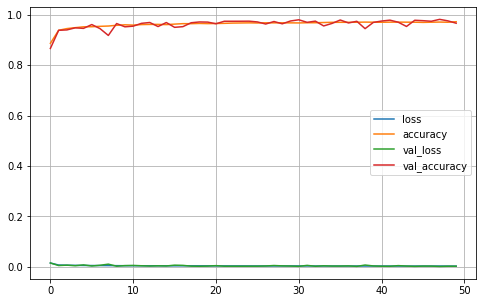

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


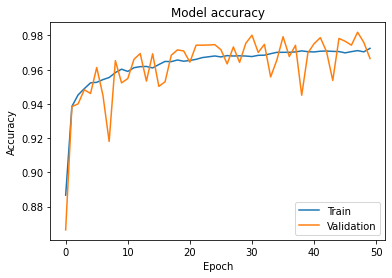

In [ ]:
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=16,epochs=50,verbose=1,validation_split=0.2)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
model_json = model.to_json()
with open('drive/MyDrive/data_training/robot_2dof/robot_2dof_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/data_training/robot_2dof/robot_2dof_weights.h5')

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[[0.3707087  0.13372892]
 [0.32728282 0.9778256 ]
 [0.944883   0.48259503]
 ...
 [0.7192797  0.17290014]
 [0.86508095 0.22165939]
 [0.8528419  0.1401596 ]]
[[0.375  0.075 ]
 [0.0225 0.965 ]
 [0.925  0.44  ]
 ...
 [0.7175 0.17  ]
 [0.855  0.235 ]
 [0.835  0.155 ]]


In [ ]:
print(x_test[120])
print(y_test[120])
print(y_pred[120])

[0.3101376 0.8978219]
[0.95499998 0.63999999]
[0.94804466 0.63625777]


In [ ]:
test = np.array([[-30,40]])
print("Test value ")
print("Px = ",test[0][0],"\nPy = ",test[0][1])
test = (test+90)/(180)
y_ = model.predict(test)
t1 = y_[0][0]*2*np.pi
t2 = y_[0][1]*np.pi
_x = l1*np.cos(t1)+l2*np.cos(t1+t2)
_y = l1*np.sin(t1)+l2*np.sin(t1+t2)
print("=> ","Theta 1 = ",t1,"\n    Theta 2 = ",t2)
print("Result when substitute predict angle to FK: \nPx = ",_x,"\nPy = ",_y)

Test value 
Px =  -30 
Py =  40
=>  Theta 1 =  1.406673115730095 
    Theta 2 =  1.9901797832735102
Result when substitute predict angle to FK: 
Px =  -30.534535325058897 
Py =  39.22821033879576


In [ ]:
_x = l1*np.cos(t1)+l2*np.cos(t1+t2)
_y = l1*np.sin(t1)+l2*np.sin(t1+t2)
print(_x,"   ",_y)

-46.6890633890343     28.563235722822085
